## Processing sensor data from Shale Hills CZO NPMS site ##

Marc Berghouse 8/8/2020

This array includes:
- Apogee Instruments SO-110 O2 sensors
- Eosense EosGP CO2 sensors


Current issues include:
- Correcting CO2 data
- Determining if seemingly erroneous data should actually be dropped
- Adding barometric pressure and precipitation
 

In [1]:
import os
os.chdir('/Users/marcb/Desktop')
os.getcwd()

'C:\\Users\\marcb\\Desktop'

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Import color palettes
from palettable.colorbrewer.sequential import Blues_6 as AP_colors # O2
from palettable.colorbrewer.sequential import YlGn_6 as GP_colors # CO2
#from palettable.colorbrewer.sequential import YlOrBr_6 as SM_colors # Soil Moisture

# Define colors, depths and installtion material 
#Apogee SO-110
AP_colors = AP_colors.hex_colors[1:]
AP_depths = {1: 30, 2: 140}

#eosGP
GP_colors = GP_colors.hex_colors[1:]
GP_depths = {1: 30, 2: 140} # Note: eosGP1 may not be at 40cm


# Define filenames
infile1 = "CO2 Data/raw_data/Shale Hills/NPMS/NPMS_CO2_O2.csv" 
#infile2 = "CO2 Data/raw_data/Shale Hills/LRMS/LRMS_precipitation.csv" 


# Read the .dat files as Pandas dataframes and load in the date/times
df = pd.read_csv(infile1,  na_values='NAN', parse_dates=[0], index_col=0) 
#df2 = pd.read_csv(infile2, na_values='NAN', parse_dates=[0], index_col=0) 
#The precipitation data is out of the date range for the CO2 data


In [3]:
#merge dataframes and drop record columns
#df=pd.concat([df1,df2], sort=False)
#df.drop(columns="RECORD")


In [4]:
#Rename all columns with format "var_depth.unit" (SoilTemp_102cm.deg.C)

df.columns=["Record", "DiffVolt_30cm.mV", "DiffVolt_140cm.mV", "SoilO2_30cm.percent.0-100", "SoilO2_140cm.percent.0-100",  "ApogeeTemp_30cm.deg.C" , "ApogeeTemp_140cm.deg.C", "CO2lo_30cm.ppm","CO2hi_30cm.ppm", "GPTemp_30cm.deg.C", "CO2lo_140cm.ppm", "CO2hi_140cm.ppm", "GPTemp_140cm.deg.C"]
df

,Record,DiffVolt_30cm.mV,DiffVolt_140cm.mV,SoilO2_30cm.percent.0-100,SoilO2_140cm.percent.0-100,ApogeeTemp_30cm.deg.C,ApogeeTemp_140cm.deg.C,CO2lo_30cm.ppm,CO2hi_30cm.ppm,GPTemp_30cm.deg.C,CO2lo_140cm.ppm,CO2hi_140cm.ppm,GPTemp_140cm.deg.C
TmStamp,,,,,,,,,,,,,
2016-08-16 12:00:00,0,52.599998,47.560001,20.690001,20.440001,-273.200010,-105.40000,5050.203100,2985.074000,24.200001,5009.4980,40075.980,25.700001
2016-08-16 13:00:00,1,52.389999,47.560001,20.610001,20.440001,-273.200010,-105.40000,5044.774900,2957.937000,24.010000,5013.5679,40097.680,25.629999
2016-08-16 14:00:00,2,52.389999,47.560001,20.610001,20.440001,-273.200010,-105.40000,5048.883800,2887.403100,23.860001,5006.8208,40054.570,25.740000
2016-08-16 15:00:00,3,52.320000,47.590000,20.580000,20.459999,-273.200010,-105.40000,5045.068800,2854.982900,24.110001,5009.7900,40067.461,25.709999
2016-08-16 16:00:00,4,52.320000,47.560001,20.580000,20.440001,-273.200010,-105.40000,5048.848100,2795.116000,24.219999,5008.1421,40054.289,26.139999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-21 14:00:00,3164,51.730000,3.565000,20.330000,0.559000,20.879999,-273.20001,5.403582,10.807164,19.280001,5012.4980,40105.387,21.750000
2020-07-21 15:00:00,3165,51.650002,3.564000,20.299999,0.558000,21.160000,-273.20001,5048.588900,10.804899,19.610001,5013.4731,40102.383,21.660000
2020-07-21 16:00:00,3166,51.570000,3.563000,20.270000,0.558000,21.510000,-273.20001,2.700879,10.803516,19.450001,5012.8315,40097.250,21.160000


In [5]:
#masking values that seem erroneous

df['DiffVolt_30cm.mV'].mask(df['DiffVolt_30cm.mV'].between(-1,30), inplace=True)
df['DiffVolt_140cm.mV'].mask(df['DiffVolt_140cm.mV'].between(-1,30), inplace=True)
df.iloc[:,6].mask(df.iloc[:,6].between(-30,1), inplace=True)
#df.iloc[:,7].mask(df.iloc[:,7].between(-30,1), inplace=True)
#df.iloc[:,7].mask(df.iloc[:,7].between(30,10000), inplace=True)
df['GPTemp_30cm.deg.C'].mask(df['GPTemp_30cm.deg.C'].between(-30,1), inplace=True)
df['GPTemp_140cm.deg.C'].mask(df['GPTemp_140cm.deg.C'].between(-30,1), inplace=True)
df['SoilO2_30cm.percent.0-100'].mask(df['SoilO2_30cm.percent.0-100'].between(-3,1), inplace=True)
df['SoilO2_140cm.percent.0-100'].mask(df['SoilO2_140cm.percent.0-100'].between(-3,1), inplace=True)


df

,Record,DiffVolt_30cm.mV,DiffVolt_140cm.mV,SoilO2_30cm.percent.0-100,SoilO2_140cm.percent.0-100,ApogeeTemp_30cm.deg.C,ApogeeTemp_140cm.deg.C,CO2lo_30cm.ppm,CO2hi_30cm.ppm,GPTemp_30cm.deg.C,CO2lo_140cm.ppm,CO2hi_140cm.ppm,GPTemp_140cm.deg.C
TmStamp,,,,,,,,,,,,,
2016-08-16 12:00:00,0,52.599998,47.560001,20.690001,20.440001,-273.200010,-105.40000,5050.203100,2985.074000,24.200001,5009.4980,40075.980,25.700001
2016-08-16 13:00:00,1,52.389999,47.560001,20.610001,20.440001,-273.200010,-105.40000,5044.774900,2957.937000,24.010000,5013.5679,40097.680,25.629999
2016-08-16 14:00:00,2,52.389999,47.560001,20.610001,20.440001,-273.200010,-105.40000,5048.883800,2887.403100,23.860001,5006.8208,40054.570,25.740000
2016-08-16 15:00:00,3,52.320000,47.590000,20.580000,20.459999,-273.200010,-105.40000,5045.068800,2854.982900,24.110001,5009.7900,40067.461,25.709999
2016-08-16 16:00:00,4,52.320000,47.560001,20.580000,20.440001,-273.200010,-105.40000,5048.848100,2795.116000,24.219999,5008.1421,40054.289,26.139999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-21 14:00:00,3164,51.730000,NaN,20.330000,NaN,20.879999,-273.20001,5.403582,10.807164,19.280001,5012.4980,40105.387,21.750000
2020-07-21 15:00:00,3165,51.650002,NaN,20.299999,NaN,21.160000,-273.20001,5048.588900,10.804899,19.610001,5013.4731,40102.383,21.660000
2020-07-21 16:00:00,3166,51.570000,NaN,20.270000,NaN,21.510000,-273.20001,2.700879,10.803516,19.450001,5012.8315,40097.250,21.160000


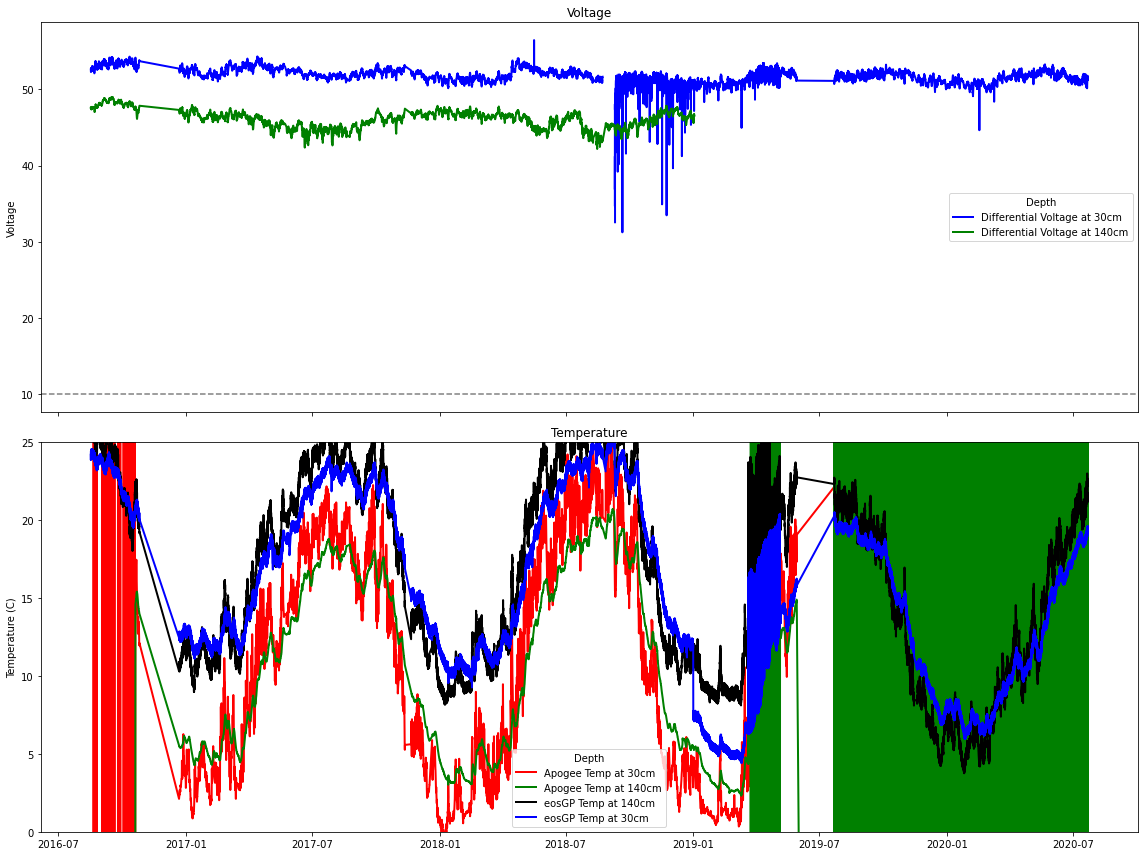

In [6]:
# Plot the datalogger parameters: battery voltage, panel temperature, enclosure temperature, and barometric pressure
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,12), tight_layout=True)

# Apogee SO-110 differntial voltages
ax1.plot(df.index, df['DiffVolt_30cm.mV'], 'b', linewidth=2, label='Differential Voltage at 30cm')
ax1.plot(df.index, df['DiffVolt_140cm.mV'], 'g', linewidth=2, label='Differential Voltage at 140cm')
ax1.set(ylabel='Voltage', title='Voltage')#, ylim=[36,48])
ax1.axhline(y=10, linestyle='--', color='k', alpha=0.5)
ax1.legend(title='Depth', loc='best')

# datalogger temperatures
#  - for some reason I can't use df['ApogeeTemp_30cm.deg.C'] and have to instead use df.iloc[:,6]
#  - The data for Apogee Temp at 140cm seems to be all messed up
ax2.plot(df.index, df["ApogeeTemp_30cm.deg.C"], 'r', linewidth=2, label='Apogee Temp at 30cm')
ax2.plot(df.index, df["ApogeeTemp_140cm.deg.C"], 'g', linewidth=2, label='Apogee Temp at 140cm')
ax2.plot(df.index, df['GPTemp_140cm.deg.C'], 'k', linewidth=2, label='eosGP Temp at 140cm')
ax2.plot(df.index, df['GPTemp_30cm.deg.C'], 'b', linewidth=2, label='eosGP Temp at 30cm')
ax2.set(ylabel='Temperature (C)', title='Temperature', ylim=[0,25])
ax2.legend(title='Depth', loc='best')


In [7]:
#Correct Apogee SO-110 O2 data
# - Apogee data has already been calibrated, although it is in percent saturation. Should we switch to ppm, or is this fine? 
#cal_fac = 0.379
#offset = 1.14
#df['SoilO2_30cm.kPa'] = cal_fac*df['SoilO2_30cm.percent.0-100'] - offset # Convert from mV to kPa
#df['SoilO2_140cm.kPa'] = cal_fac*df['SoilO2_140cm.percent.0-100'] - offset

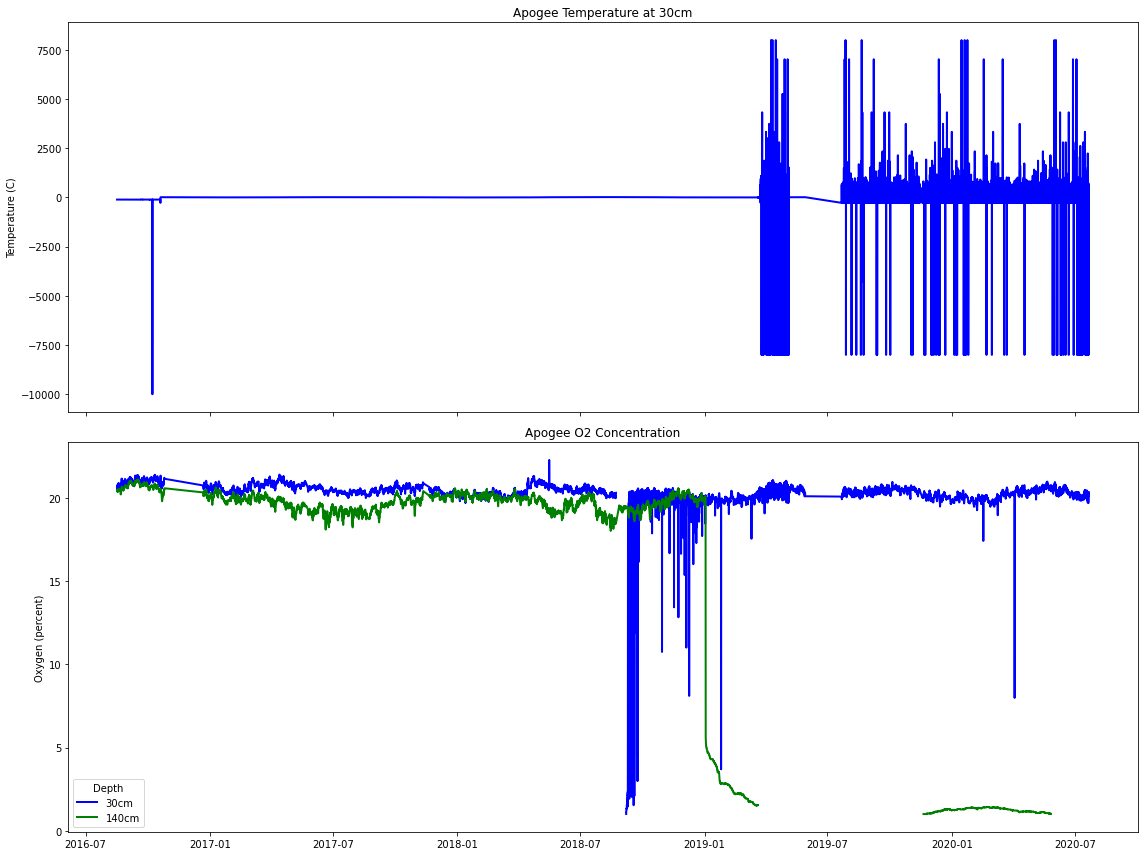

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(16,12), sharex=True, tight_layout=True)
ax1.plot(df.index, df.iloc[:,6], 'b', linewidth=2)
ax1.set(ylabel='Temperature (C)', title='Apogee Temperature at 30cm')

ax2.plot(df.index, df['SoilO2_30cm.percent.0-100'], 'b', linewidth=2, label='30cm')
ax2.set(ylabel='Oxygen (percent)', title='Apogee O2 Concentration')
ax2.plot(df.index, df['SoilO2_140cm.percent.0-100'], 'g', linewidth=2, label='140cm')
ax2.legend(title='Depth', loc='best')

#df['Apogee_CorrO2_Avg'] = df['SoilO2_30cm.kPa']/df['BarometricPress_Avg']*100
#ax3.plot(df.index, df['Apogee_CorrO2_Avg'], 'k', linewidth=2)
#ax3.set(ylabel='Oxygen (%)', title='Apogee O2 Concentration');

C:\Users\marcb\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


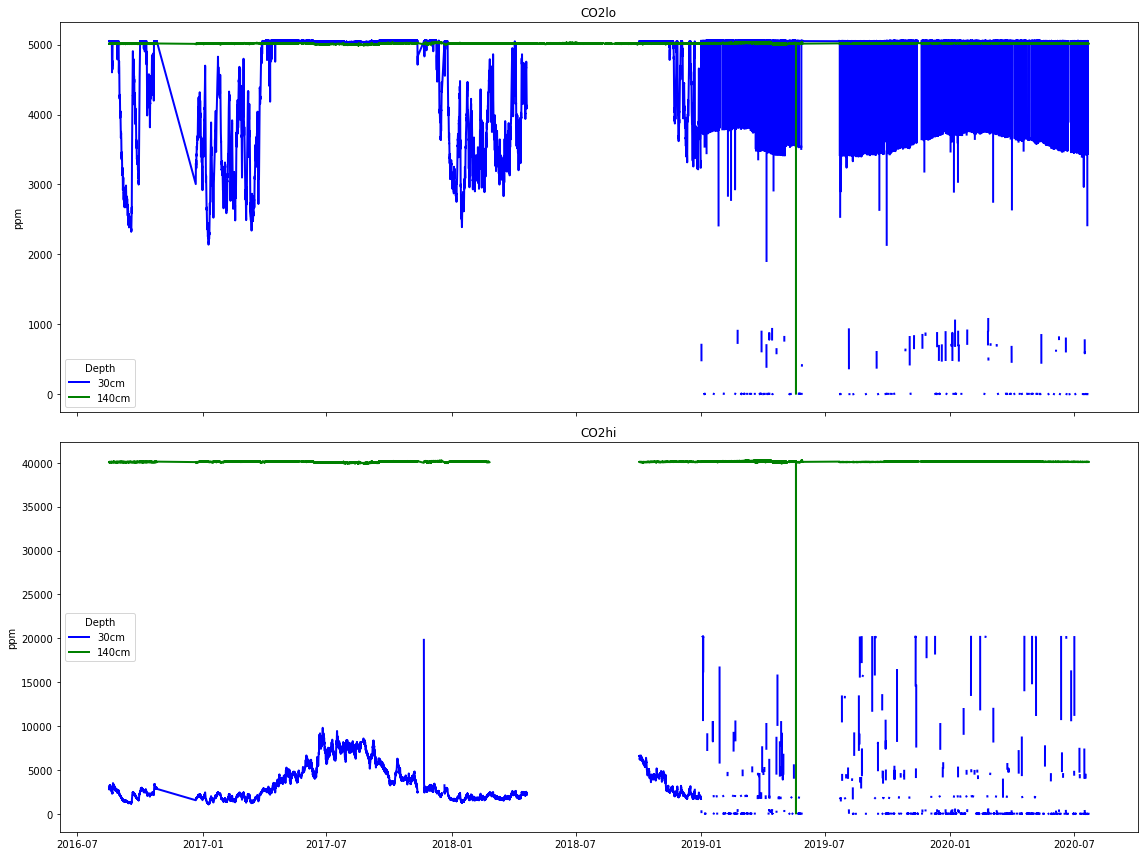

In [9]:
#Correct CO2 data 
df['pct_change_CO2lo30']=(df['CO2lo_30cm.ppm'].pct_change())
df['CO2lo_30cm.ppm'].mask(df['pct_change_CO2lo30']>=.5, inplace=True)
df['CO2lo_30cm.ppm'].mask(df['pct_change_CO2lo30']<=-.5, inplace=True)

df['pct_change_CO2hi30']=(df['CO2hi_30cm.ppm'].pct_change())
df['CO2hi_30cm.ppm'].mask(df['pct_change_CO2hi30']>=.5, inplace=True)
df['CO2hi_30cm.ppm'].mask(df['pct_change_CO2hi30']<=-.5, inplace=True)

df['CO2lo_30cm.ppm'].loc['4/20/2018 2:00:00 PM':'10/2/2018  2:00:00 PM']=np.nan
df['CO2hi_30cm.ppm'].loc['4/20/2018 2:00:00 PM':'10/2/2018  2:00:00 PM']=np.nan
df['CO2hi_140cm.ppm'].loc['2/24/2018  6:00:00 PM':'10/2/2018  2:00:00 PM']=np.nan
fig, (ax1, ax2) = plt.subplots(2, figsize=(16,12), sharex=True, tight_layout=True)
ax1.plot(df.index, df['CO2lo_30cm.ppm'], 'b', linewidth=2, label='30cm')
ax1.plot(df.index, df['CO2lo_140cm.ppm'], 'g', linewidth=2, label='140cm')
#ax1.plot(df.index, df['CO2lo_140cm.ppm'], 'g', linewidth=2, label='140cm')
ax1.set(ylabel='ppm', title='CO2lo')
ax1.legend(title='Depth', loc='best')
ax2.plot(df.index, df['CO2hi_30cm.ppm'], 'b', linewidth=2, label='30cm')
ax2.plot(df.index, df['CO2hi_140cm.ppm'], 'g', linewidth=2, label='140cm')
ax2.set(ylabel='ppm', title='CO2hi')
ax2.legend(title='Depth', loc='best')

In [10]:
output=df.copy()
today = dt.date.today()
outfile = 'CO2 Data/processed_data/Shale Hills/NPMS_CO2_O2_processed.csv'
output.to_csv(outfile, na_rep=-99999, index_label='DateTime.MST')

In [11]:
output

,Record,DiffVolt_30cm.mV,DiffVolt_140cm.mV,SoilO2_30cm.percent.0-100,SoilO2_140cm.percent.0-100,ApogeeTemp_30cm.deg.C,ApogeeTemp_140cm.deg.C,CO2lo_30cm.ppm,CO2hi_30cm.ppm,GPTemp_30cm.deg.C,CO2lo_140cm.ppm,CO2hi_140cm.ppm,GPTemp_140cm.deg.C,pct_change_CO2lo30,pct_change_CO2hi30
TmStamp,,,,,,,,,,,,,,,
2016-08-16 12:00:00,0,52.599998,47.560001,20.690001,20.440001,-273.200010,-105.40000,5050.2031,2985.074000,24.200001,5009.4980,40075.980,25.700001,NaN,NaN
2016-08-16 13:00:00,1,52.389999,47.560001,20.610001,20.440001,-273.200010,-105.40000,5044.7749,2957.937000,24.010000,5013.5679,40097.680,25.629999,-0.001075,-0.009091
2016-08-16 14:00:00,2,52.389999,47.560001,20.610001,20.440001,-273.200010,-105.40000,5048.8838,2887.403100,23.860001,5006.8208,40054.570,25.740000,0.000814,-0.023846
2016-08-16 15:00:00,3,52.320000,47.590000,20.580000,20.459999,-273.200010,-105.40000,5045.0688,2854.982900,24.110001,5009.7900,40067.461,25.709999,-0.000756,-0.011228
2016-08-16 16:00:00,4,52.320000,47.560001,20.580000,20.440001,-273.200010,-105.40000,5048.8481,2795.116000,24.219999,5008.1421,40054.289,26.139999,0.000749,-0.020969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-21 14:00:00,3164,51.730000,NaN,20.330000,NaN,20.879999,-273.20001,NaN,NaN,19.280001,5012.4980,40105.387,21.750000,-0.998930,-0.999309
2020-07-21 15:00:00,3165,51.650002,NaN,20.299999,NaN,21.160000,-273.20001,NaN,10.804899,19.610001,5013.4731,40102.383,21.660000,933.304098,-0.000210
2020-07-21 16:00:00,3166,51.570000,NaN,20.270000,NaN,21.510000,-273.20001,NaN,10.803516,19.450001,5012.8315,40097.250,21.160000,-0.999465,-0.000128
